In [1]:
from bs4 import BeautifulSoup
import requests

In [3]:
import pandas as pd 
df_jl = pd.read_csv('job_listings1.csv')

In [4]:

print(df_jl.shape)
df_jl.head()

(426, 3)


,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [5]:

df_jl['description'] = [BeautifulSoup(description).get_text() for description in df_jl['description'] ]

In [7]:
df_jl.head()

,Unnamed: 0,description,title
0,0,"b""Job Requirements:\nConceptual understanding ...",Data scientist
1,1,"b'Job Description\n\nAs a Data Scientist 1, yo...",Data Scientist I
2,2,b'As a Data Scientist you will be working on c...,Data Scientist - Entry Level
3,3,"b'$4,969 - $6,756 a monthContractUnder the gen...",Data Scientist
4,4,b'Location: USA \xe2\x80\x93 multiple location...,Data Scientist


## clean and tokenize

In [8]:

import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [10]:
job_str = df_jl.title.to_string()
type(job_str)
print(job_str)

0                                        Data scientist 
1                                       Data Scientist I
2                           Data Scientist - Entry Level
3                                         Data Scientist
4                                         Data Scientist
5                                         Data Scientist
6           Associate Data Scientist – Premium Analytics
7                                         Data Scientist
8                                     Sr. Data Scientist
9                               Data Scientist, Lifecyle
10                          Data Scientist, Neuroimaging
11                                     Data Scientist II
12                                        Data Scientist
13          Associate Data Scientist – Premium Analytics
14                                        Data Scientist
15                                        Data Scientist
16                                 Data Scientist - Risk
17                             

In [14]:
# Tokenizer Pipe

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(df_jl['description'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

df_jl['tokens'] = tokens

In [15]:
df_jl.head()

,Unnamed: 0,description,title,tokens
0,0,"b""Job Requirements:\nConceptual understanding ...",Data scientist,"[b""Job, Requirements:\nConceptual, understandi..."
1,1,"b'Job Description\n\nAs a Data Scientist 1, yo...",Data Scientist I,"[b'Job, Description\n\nAs, a, Data, Scientist,..."
2,2,b'As a Data Scientist you will be working on c...,Data Scientist - Entry Level,"[b'As, a, Data, Scientist, you, will, be, work..."
3,3,"b'$4,969 - $6,756 a monthContractUnder the gen...",Data Scientist,"[b'$4,969, -, $6,756, a, monthContractUnder, t..."
4,4,b'Location: USA \xe2\x80\x93 multiple location...,Data Scientist,"[b'Location:, USA, \xe2\x80\x93, multiple, loc..."


In [17]:
from sklearn.feature_extraction.text import CountVectorizer


# create the transformer
count = CountVectorizer()

# build vocab
count.fit(df_jl)

# transform text
dtm = count.transform(df_jl)


In [21]:
print(dtm)

  (0, 3)	1
  (1, 0)	1
  (2, 1)	1
  (3, 2)	1


In [22]:
dtm.todense()

matrix([[0, 0, 0, 1],
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0]], dtype=int64)

In [24]:
# Get Word Counts for each document
dtm = pd.DataFrame(dtm.todense(), columns=count.get_feature_names())
dtm

,description,title,tokens,unnamed
0,0,0,0,1
1,1,0,0,0
2,0,1,0,0
3,0,0,1,0


C:\Users\zebfr\Anaconda3\envs\U4-S1-NLP\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


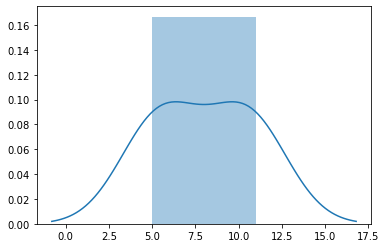

In [25]:
doc_len = [len(doc) for doc in df_jl]

import seaborn as sns

sns.distplot(doc_len);

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english')

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(df_jl)

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,description,title,tokens,unnamed
0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0


In [28]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [32]:
'''

# Tunning Parameters

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', 
                        ngram_range=(1,2),
                        max_df=.97,
                        min_df=3,
                        tokenizer=tokenize)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(df_jl) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()
'''

"\n\n# Tunning Parameters\n\n# Instantiate vectorizer object\ntfidf = TfidfVectorizer(stop_words='english', \n                        ngram_range=(1,2),\n                        max_df=.97,\n                        min_df=3,\n                        tokenizer=tokenize)\n\n# Create a vocabulary and get word counts per document\ndtm = tfidf.fit_transform(df_jl) # Similiar to fit_predict\n\n# Print word counts\n\n# Get feature names to use as dataframe column headers\ndtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())\n\n# View Feature Matrix as DataFrame\ndtm.head()\n"

In [33]:
dtm.head()

,description,title,tokens,unnamed
0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0


In [36]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=4, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=4, p=2, radius=1.0)

In [37]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 1.41421356, 1.41421356, 1.41421356]]),
 array([[0, 3, 2, 1]], dtype=int64))

In [40]:
# Query Using kneighbors 
nn.kneighbors([dtm.iloc[2]])

(array([[0.        , 1.41421356, 1.41421356, 1.41421356]]),
 array([[2, 3, 0, 1]], dtype=int64))

In [43]:
df_jl[0][:3]

KeyError: 0